In [103]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import pandas as pd
import openpyxl

import scipy.optimize

# Resonancia eléctrica

In [104]:
def Minimos_cuadrados(x,y,n=1):
    l = x.shape[0]
    b = y
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b)

    xsol = np.linalg.solve(AT,bT)
    
    return xsol

def GetModel(x,p):
    
    y = 0.
    for i in range(len(p)):
        y += p[i]*x**i
        
    return y

def GetError(x,y,p,n=1):
    
    l = x.shape[0]
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    # Residuos
    R = y - np.dot(A,p)
    
    sigma2 = np.dot(R.T,R)/(len(y)-len(p))
    
    Cov = sigma2*np.linalg.inv(np.dot(A.T,A))
    
    R2 = None
    if np.shape(Cov) == (2,2):
        R2 = (Cov[0][1]**2)/(Cov[0][0]*Cov[1][1])

    return (Cov,R2,R)

def Get_sigma(Cov):
    sigmaai = np.sqrt(np.diagonal(Cov))
    return sigmaai[::-1]

def Error_relativo(X_real,X_exp):
    return (np.abs(X_exp - X_real)/X_real)

def presicion(d,v):
    p = (d/v)
    if p <= 0.1:
        return p,True
    else:
        return p,False
    
def exactitud(xr,xm,d):
    e = (np.abs(xr-xm))
    if e <= (2.5*d):
        return e/d,True
    else:
        return e/d,False
    
X = sym.Symbol('x',real=True)
Y = sym.Symbol('y',real=True)

# Datos

In [105]:
L = 9*(10**(-3))
C = 4.7*(10**(-8))
R1 = 200
R2 = 300

In [106]:
w0_t = np.sqrt(1/(L*C))
w0_t

48621.663832631515

In [107]:
g_t1 = R1/L
g_t2 = R2/L
(g_t1,g_t2)

(22222.22222222222, 33333.33333333333)

In [108]:
# El osciloscopio presentó error a partir de 9kHz
wb = openpyxl.load_workbook(r"C:\Users\ASUS\OneDrive\Uniandes\Física\Ondas y Fluidos\Lab_OyF\Resonancia RLC/resonancia.xlsx")
datos = pd.read_excel(io = r"C:\Users\ASUS\OneDrive\Uniandes\Física\Ondas y Fluidos\Lab_OyF\Resonancia RLC/resonancia.xlsx", header=0,sheet_name='Hoja1',names=None,index_col=None,usecols='A:D',engine='openpyxl')
print(datos.head())

   Frecuencia (kHz)  fase  Vpp1  Vpp2
0               5.5 -40.0  4.72  3.60
1               6.0 -30.0  4.64  3.84
2               6.5 -25.0  4.56  4.08
3               7.0 -15.0  4.56  4.24
4               7.5   0.0  4.48  4.32


In [109]:
datos_ = datos.values
datos_np = np.float64(np.transpose(datos_))
frec = datos_np[0] * 1000
fase = datos_np[1]
Vpp1 = datos_np[2]
Vpp2 = datos_np[3]
fase

array([-40. , -30. , -25. , -15. ,   0. ,   5. ,  15.2,  22.6,  25. ])

# Análisis

In [110]:
w = 2*np.pi*frec
np.round(w/1000,2)

array([34.56, 37.7 , 40.84, 43.98, 47.12, 50.27, 53.41, 56.55, 59.69])

In [111]:
delta = fase*(np.pi/180)
np.round(delta,2)

array([-0.7 , -0.52, -0.44, -0.26,  0.  ,  0.09,  0.27,  0.39,  0.44])

Text(0.5, 0, 'Frecuencia angular')

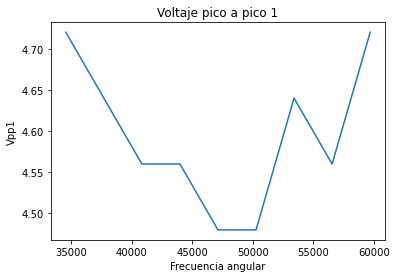

In [112]:
plt.plot(w,Vpp1)
plt.title('Voltaje pico a pico 1')
plt.ylabel('Vpp1')
plt.xlabel('Frecuencia angular')

Text(0.5, 0, 'Frecuencia angular')

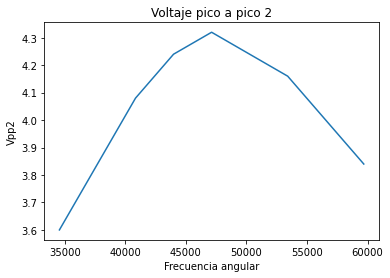

In [113]:
plt.plot(w,Vpp2)
plt.title('Voltaje pico a pico 2')
plt.ylabel('Vpp2')
plt.xlabel('Frecuencia angular')

In [114]:

def A_v(w_,V0,g,w0): return (V0*g*w_)/(np.sqrt((w_**2)*(g**2)+((w0**2)-(w_**2))**2))
popt, pcov = scipy.optimize.curve_fit(A_v,w,Vpp2)
V0,g,w0 = popt
fitfunc = lambda w_: (V0*g*w_)/(np.sqrt((w_**2)*(g**2)+((w0**2)-(w_**2))**2))
V0

c:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


4.035555553642698

In [115]:
(w0,g)

(1.0, 375337619.8849056)

In [116]:
g/(10**8)

3.7533761988490557

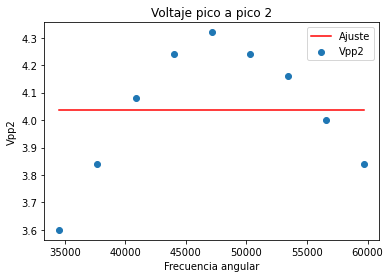

In [117]:
x = np.linspace(min(w),max(w))
plt.plot(x,fitfunc(x),color='red',label='Ajuste')
plt.scatter(w,Vpp2,label='Vpp2')
plt.title('Voltaje pico a pico 2')
plt.ylabel('Vpp2')
plt.xlabel('Frecuencia angular')
plt.legend()

Text(0.5, 0, 'Frecuencia angular')

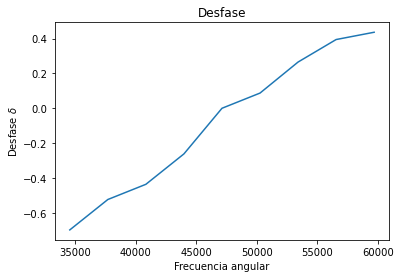

In [118]:
plt.plot(w,delta)
plt.title('Desfase')
plt.ylabel('Desfase $\delta$')
plt.xlabel('Frecuencia angular')

In [119]:
# = np.array([w_0_t,g_t])
def delta_func(w_,w0,g): return np.arctan((w_*g)/((w0**2)-(w_**2)))
popt, pcov = scipy.optimize.curve_fit(delta_func,w,delta)
w0,g = popt
fitfunc = lambda w_: np.arctan((w_*g)/(w0**2-w_**2))

c:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [120]:
(w0,g)

(1.0, 6615.115170904973)

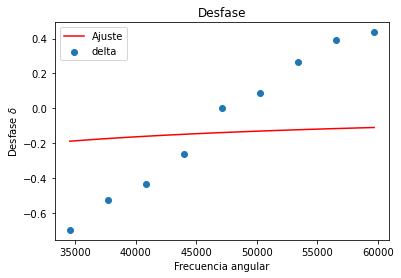

In [121]:
x = np.linspace(min(w),max(w))
plt.scatter(w,delta,label='delta')
plt.plot(x,fitfunc(x),color='red',label='Ajuste')
plt.title('Desfase')
plt.ylabel('Desfase $\delta$')
plt.xlabel('Frecuencia angular')
plt.legend()